<img align="left" style="padding-right:10px; width:150px;" src="https://mfr.osf.io/export?url=https://osf.io/q7ym9/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">
*This [Mindboggle](http://mindboggle.info) tutorial runs within docker with an updated Mindboggle.*
<font size="1">*&nbsp;&nbsp;-- <a href="http://binarybottle.com">Arno Klein</a> and Anisha Keshavan with figures from the [Mindboggle reference](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1005350#sec007) (<a href="https://creativecommons.org/licenses/by/3.0/us/legalcode">CC-BY</a>)*  
</font>
<font size="2">
&nbsp;&nbsp;``$ docker run -it --rm -p 8888:8888 -v /Users/arno/Data/workshops:/home/jovyan/work nipype/workshops:latest-complete bash``<br>
&nbsp;&nbsp;``$ git clone https://github.com/nipy/mindboggle.git; cd mindboggle; python setup.py install; cd ..;``<br>
&nbsp;&nbsp;``$ jupyter notebook``<br>
</font>

# Mindboggle tutorial

1. [Introduction](#introduction)
2. [Mindboggle processing steps](#processing)
3. [Run "mindboggle --help" on the command line](#help)
4. [Run "mindboggle" command with example data](#command)
5. [Mindboggle Python library](#library)
6. Run individual functions:
   - [Example 1: Compute histogram values from a nibabel-readable image](#example1)
   - [Example 2: Compute statistical measures across vertices per label](#example2)
   - [Example 3: Decimate a left postcentral pial surface](#example3)
   - [Example 4: Relabel a VTK surface](#example4)
   - [Example 5: Segment deep vertices of surface into contiguous regions](#example5)
   - [Example 6: Extract sulcus label borders](#example6)

<a id="introduction"></a>

## Introduction

<a id="processing"></a>

## Mindboggle processing steps

<img style="padding-right:10px;" src="https://mfr.osf.io/export?url=https://osf.io/dcuh8/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">

### Output
Mindboggle takes in (FreeSurfer- and optionally ANTs-) preprocessed T1-weighted MRI data, and outputs nifti volumes, vtk surfaces, and csv tables containing label, feature, and shape information for further analysis:

- **labels/**:  *integer-labeled vtk surfaces and nifti volumes*
- **features/**:  *integer-labeled sulci or fundi on vtk surfaces*
- **shapes/**:  *float shape value for every point on vtk surfaces*
- **tables/**:  *csv tables of shape values for every label/feature/vertex*

### Processing steps

1. **Combine FreeSurfer and ANTs gray/white segmentations.**
<img style="padding-right:10px; width:600px;" src="https://mfr.osf.io/export?url=https://osf.io/k5kr8/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">
2. **Fill hybrid segmentation with (FreeSurfer- or ANTs-registered) labels.**
3. **Compute volume shape measures for each labeled region:**
    - **volume** and "thickinthehead" **cortical thickness**
<img style="padding-right:10px; width:600px;" src="https://mfr.osf.io/export?url=https://osf.io/n5hvx/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">
4. **Compute surface shape measures for every cortical mesh vertex** (in addition to FreeSurfer's convexity and thickness)
    - **surface area**
<img style="padding-right:10px; width:600px;" src="https://mfr.osf.io/export?url=https://osf.io/6varh/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">
    - **geodesic depth** and **travel depth**
<img style="padding-right:10px; width:600px;" src="https://mfr.osf.io/export?url=https://osf.io/uv9u6/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">
    - **mean curvature**
<img style="padding-right:10px; width:600px;" src="https://mfr.osf.io/export?url=https://osf.io/v7v2u/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">
5. **Extract cortical surface features**:
    - **folds** (left and upper right, with manual labels) 
    - **sulci** (lower right)
<img style="padding-right:10px; width:600px;" src="https://mfr.osf.io/export?url=https://osf.io/jq828/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">
    - **fundi**
<img style="padding-right:10px; width:300px;" src="https://mfr.osf.io/export?url=https://osf.io/27pjt/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">
6. **For each cortical surface label/sulcus, compute**:
    - **area**
    - **mean coordinates** (in native and in MNI152 space)
    - **Zernike moments**
    - **Laplace-Beltrami spectrum** (2nd, 3rd, and 9th spectral components shown for two brains)
<img style="padding-right:10px; width:600px;" src="https://mfr.osf.io/export?url=https://osf.io/zhbvy/?action=download%26direct%26mode=render&initialWidth=673&childId=mfrIframe&format=1200x1200.jpeg">  
7. **Compute statistics for each shape measure across vertices for each label/feature**:
    - median
    - median absolute deviation
    - mean
    - standard deviation
    - skew
    - kurtosis
    - lower and upper quartiles

<a id="help"></a>

## Run "mindboggle --help" on the command line

First, let's see what command-line options Mindboggle provides:

In [1]:
! mindboggle --help

usage: mindboggle [-h] [-v] [-c INT] [--ants STR] [--out STR] [--working STR]
                  [--cache STR] [--no_volumes] [--no_surfaces] [--no_labels]
                  [--no_shapes] [--no_sulci] [--no_points] [--no_moments]
                  [--no_spectra] [--no_thickness] [--fundi] [--moments INT]
                  [--spectra INT] [--my_atlas STR] [--my_atlases  [...]]
                  [--my_graywhite STR] [--my_transform STR] [--graph STR]
                  [--plugin PLUGIN] [--plugin_args PLUGIN_ARGS]
                  DATA

The Mindboggle software automates shape analysis of anatomical labels and
features extracted from human brain MR image data (http://mindboggle.info).
Example: mindboggle $HOME/freesurfer/subjects/arno --ants
$HOME/ants/subjects/arno/antsBrainSegmentation.nii.gz

positional arguments:
  DATA                       path to directory of a person's brain data,
                             usually generated by the FreeSurfer software

optional arguments:
  -h, -

<a id="command"></a>

## Run "mindboggle" command with example data

In the following example, we will run Mindboggle on FreeSurfer (but not ANTs) data to get shape measures such as curvature, depth, and area for cortical surface labels, and to make it quick, we will turn off volume labels and volume shape measures, sulci, and surface-based Zernike moments and Laplace-Beltrami spectra.

In [4]:
%%bash
HOST=/home/jovyan/work/;
FREESURFER_SUBJECT=$HOST/Data/workshops/ds000114/derivatives/freesurfer/sub-01;
MINDBOGGLING=$HOST/mindboggling;
MINDBOGGLED=$HOST/mindboggled;

mindboggle $FREESURFER_SUBJECT --working $MINDBOGGLING --out $MINDBOGGLED \
           --no_volumes --no_sulci --no_moments --no_spectra #--roygbiv

Create missing cache directory: /home/jovyan/mindboggle_cache
Create missing hash directory: /home/jovyan/mindboggle_cache/f36e3d5d99f7c4a9bb70e2494ed7340b
Retrieve file from URL: https://osf.io/ufydw/?action=download&version=1
Copy file to cache: /home/jovyan/mindboggle_cache/f36e3d5d99f7c4a9bb70e2494ed7340b/OASIS-30_Atropos_template_to_MNI152_affine.txt.txt
170328-17:06:24,169 workflow INFO:
	 Workflow Mindboggle settings: ['check', 'execution', 'logging']
170328-17:06:24,247 workflow INFO:
	 Running serially.
170328-17:06:24,247 workflow INFO:
	 Executing node Fetch_Mindboggle_atlas in dir: /home/jovyan/work/mindboggling/sub-01/Mindboggle/Fetch_Mindboggle_atlas
170328-17:06:24,260 workflow INFO:
170328-17:06:24,266 workflow INFO:
	 Executing node Freesurfer_annot.a0 in dir: /home/jovyan/work/mindboggling/sub-01/Mindboggle/_hemi_lh/Freesurfer_annot
170328-17:06:24,344 workflow INFO:
	 Executing node Surfaces.a0 in dir: /home/jovyan/work/mindboggling/sub-01/Mindboggle/_hemi_lh/Surface

ERROR: In ../IO/Legacy/vtkDataReader.cxx, line 430
vtkDataSetReader (0x41b9ca0): Unable to open file: /home/jovyan/work/Users/arno/mindboggling/sub-01/Mindboggle/_hemi_lh/Surface_to_vtk/lh.pial.vtk

ERROR: In ../Common/ExecutionModel/vtkExecutive.cxx, line 784
vtkCompositeDataPipeline (0x41bc940): Algorithm vtkDataSetReader(0x41b9ca0) returned failure for request: vtkInformation (0x41bbc10)
  Debug: Off
  Modified Time: 94
  Reference Count: 1
  Registered Events: (none)
  Request: REQUEST_DATA_OBJECT
  ALGORITHM_AFTER_FORWARD: 1
  FORWARD_DIRECTION: 0



ERROR: In ../IO/Legacy/vtkDataReader.cxx, line 430
vtkDataSetReader (0x41b9ca0): Unable to open file: /home/jovyan/work/Users/arno/mindboggling/sub-01/Mindboggle/_hemi_lh/Surface_to_vtk/lh.pial.vtk

ERROR: In ../Common/ExecutionModel/vtkExecutive.cxx, line 784
vtkCompositeDataPipeline (0x41bc940): Algorithm vtkDataSetReader(0x41b9ca0) returned failure for request: vtkInformation (0x41bbc10)
  Debug: Off
  Modified Time: 94
  Reference

<a id="library"></a>

## Mindboggle Python library

Rather than call Mindboggle from the command line, we can also call individual Python functions within the Mindboggle library, which includes the following files:

  - mindboggle/mindboggle/
    - **mio**/  *-- input/output functions*
        - **[colors](https://github.com/nipy/mindboggle/blob/master/mindboggle/mio/colors.py)**.py  *-- colormap-related functions*
        - **[convert_volumes](https://github.com/nipy/mindboggle/blob/master/mindboggle/mio/convert_volumes.py)**.py  *-- read/write nifti volume files*
        - **[fetch_data](https://github.com/nipy/mindboggle/blob/master/mindboggle/mio/fetch_data.py)**.py  *-- fetch data from a URL or from third party software*
        - **[labels](https://github.com/nipy/mindboggle/blob/master/mindboggle/mio/labels.py)**.py  *-- information about labeling protocols*
        - **[plots](https://github.com/nipy/mindboggle/blob/master/mindboggle/mio/plots.py)**.py  *-- plot functions*
        - **[tables](https://github.com/nipy/mindboggle/blob/master/mindboggle/mio/tables.py)**.py  *-- read/write tables*
        - **[vtks](https://github.com/nipy/mindboggle/blob/master/mindboggle/mio/vtks.py)**.py  *-- read/write VTK surface files*
    - **guts**/  *-- the "guts" underlying feature extraction and labeling code*
        - **[compute](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/compute.py)**.py  *-- compute distances, etc.*
        - **[graph](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/graph.py)**.py  *-- graph operations*
        - **[kernels](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/kernels.py)**.py  *-- kernels for graph operations*
        - **[mesh](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/mesh.py)**.py  *-- operate on surface mesh vertices*
        - **[paths](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/paths.py)**.py  *-- connect surface mesh vertices*
        - **[rebound](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/rebound.py)**.py  *-- adjust label borders on a surface mesh*
        - **[relabel](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/relabel.py)**.py  *-- relabel surface or volume files*
        - **[segment](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/segment.py)**.py  *-- segment a surface mesh*
    - **features**/  *-- higher-level feature extraction (folds, fundi, sulci)*
        - **[folds](https://github.com/nipy/mindboggle/blob/master/mindboggle/features/folds.py)**.py  *-- extract surface folds*
        - **[fundi](https://github.com/nipy/mindboggle/blob/master/mindboggle/features/fundi.py)**.py  *-- extract fundus curves from folds*
        - **[sulci](https://github.com/nipy/mindboggle/blob/master/mindboggle/features/sulci.py)**.py  *-- extract sulci from folds*
    - **shapes**/  *-- shape measurement functions
        - **[surface_shapes](https://github.com/nipy/mindboggle/blob/master/mindboggle/shapes/surface_shapes.py)**.py  *-- compute surface shapes (calls C++ library below)*
        - **[volume_shapes](https://github.com/nipy/mindboggle/blob/master/mindboggle/shapes/volume_shapes.py)**.py  *-- compute volumes and thicknesses*
        - **[laplace_beltrami](https://github.com/nipy/mindboggle/blob/master/mindboggle/shapes/laplace_beltrami.py)**.py  *-- compute a Laplace-Beltrami spectrum*
        - **[zernike/zernike](https://github.com/nipy/mindboggle/blob/master/mindboggle/shapes/zernike/zernike.py)**.py  *-- compute Zernike moments of a collection of vertices*
        - **[likelihood](https://github.com/nipy/mindboggle/blob/master/mindboggle/shapes/likelihood.py)**.py  *-- compute (fundus) likelihood values*
    - **thirdparty/**  *-- third-party code*
        - **[ants](https://github.com/nipy/mindboggle/blob/master/mindboggle/thirdparty/ants.py)**.py  *-- call ANTs commands*
        - **[vtkviewer](https://github.com/nipy/mindboggle/blob/master/mindboggle/thirdparty/vtkviewer.py)**.py  *-- VTK viewer (by Hal Canary)*

  - mindboggle/vtk_cpp_tools  *-- C++ tools for measuring shapes on VTK surface files*
    - **[area](https://github.com/nipy/mindboggle/blob/master/vtk_cpp_tools/area/PointAreaMain.cpp)**/
    - **[curvature](https://github.com/nipy/mindboggle/blob/master/vtk_cpp_tools/curvature/CurvatureMain.cpp)**/
    - **[geodesic_depth](https://github.com/nipy/mindboggle/blob/master/vtk_cpp_tools/geodesic_depth/GeodesicDepthMain.cpp)**/
    - **[travel_depth](https://github.com/nipy/mindboggle/tree/master/vtk_cpp_tools/travel_depth)**/
    - **[gradient](https://github.com/nipy/mindboggle/blob/master/vtk_cpp_tools/gradient/GradientMain.cpp)**/
    - **[surface_overlap](https://github.com/nipy/mindboggle/blob/master/vtk_cpp_tools/surface_overlap/SurfaceOverlapMain.cpp)**/

<a id="functions"></a>

## Run individual functions

Let's run some functions within Mindboggle's Python library.  The following examples are excerpts from the above files' docstrings.

Convert a FreeSurfer surface file to VTK format:

In [36]:
import os
from mindboggle.mio.vtks import freesurfer_surface_to_vtk
subject_path = '/home/jovyan/work/Data/workshops/ds000114/derivatives/freesurfer/sub-01/'
surface_file = freesurfer_surface_to_vtk(surface_file=subject_path + 'surf/lh.pial', 
                                         orig_file=subject_path + 'mri/orig.mgz',
                                         output_vtk='lh.pial.vtk')

Load a FreeSurfer .annot file and save as a VTK format file:

In [37]:
import numpy as np
from mindboggle.mio.vtks import freesurfer_annot_to_vtk
labels, label_file = freesurfer_annot_to_vtk(annot_file=subject_path + 'label/lh.aparc.annot',
                                             vtk_file=surface_file,
                                             output_vtk='lh.aparc.annot.vtk',
                                             background_value=-1)
nlabels = [len(np.where(labels == x)[0]) for x in np.unique(labels)]

Write out a separate VTK file for each integer in (the first) scalar list of an input VTK file 
(optionally write the values drawn from a second VTK file):

In [43]:
from mindboggle.mio.vtks import explode_scalars
label_files = explode_scalars(input_indices_vtk=label_file,
                              input_values_vtk='',
                              output_stem='label',
                              exclude_values=[-1],
                              background_value=-1,
                              output_scalar_name='label',
                              remove_background_faces=True,
                              reindex=True,
                              verbose=True)
label_files

Explode the scalar list in lh.aparc.annot.vtk
  Scalar 1: 1184 vertices
  Scalar 2: 565 vertices
  Scalar 3: 2069 vertices
  Scalar 5: 1899 vertices
  Scalar 6: 430 vertices
  Scalar 7: 3774 vertices
  Scalar 8: 4977 vertices
  Scalar 9: 3820 vertices
  Scalar 10: 899 vertices
  Scalar 11: 5351 vertices
  Scalar 12: 2456 vertices
  Scalar 13: 2774 vertices
  Scalar 14: 2279 vertices
  Scalar 15: 3378 vertices
  Scalar 16: 1025 vertices
  Scalar 17: 1725 vertices
  Scalar 18: 1627 vertices
  Scalar 19: 587 vertices
  Scalar 20: 1381 vertices
  Scalar 21: 1249 vertices
  Scalar 22: 5216 vertices
  Scalar 23: 1291 vertices
  Scalar 24: 6211 vertices
  Scalar 25: 4094 vertices
  Scalar 26: 870 vertices
  Scalar 27: 5788 vertices
  Scalar 28: 8135 vertices
  Scalar 29: 6473 vertices
  Scalar 30: 4288 vertices
  Scalar 31: 3950 vertices
  Scalar 32: 374 vertices
  Scalar 33: 513 vertices
  Scalar 34: 579 vertices
  Scalar 35: 2755 vertices


Measure "travel depth" of each vertex in a surface mesh:

In [42]:
label_files[0]

TypeError: 'NoneType' object is not subscriptable

In [41]:
from mindboggle.shapes.surface_shapes import travel_depth
from mindboggle.mio.vtks import read_scalars
ccode_path = '/opt/mindboggle/vtk_cpp_tools'
command = os.path.join(ccode_path, 'travel_depth', 'TravelDepthMain')
depth_file = travel_depth(command=command,
                          surface_file=label_files[0],
                          verbose=True)
depths, name = read_scalars(depth_file)
[np.float("{0:.{1}f}".format(x, 5)) for x in depths[0:8]]

TypeError: 'NoneType' object is not subscriptable

In [ ]:
label_depth_files = explode_scalars(input_indices_vtk=label_file,
                                    input_values_vtk=,
                                    output_stem='label_depth',
                                    exclude_values=[-1],
                                    background_value=-1,
                                    output_scalar_name='label_depth',
                                    remove_background_faces=True,
                                    reindex=True,
                                    verbose=True)

def freesurfer_curvature_to_vtk(surface_file, vtk_file, output_vtk='',
                                background_value=-1):
    """
    Convert FreeSurfer curvature, thickness, or convexity file to VTK format.

    Parameters
    ----------
    surface_file : string
        name of FreeSurfer surface file
    vtk_file : string
        name of VTK surface file
    output_vtk : string
        name of output VTK file
    background_value : integer or float
        background value

    Returns
    -------
    output_vtk : string
        name of output VTK file, where each vertex is assigned
        the corresponding shape value

    Examples
    --------
from mindboggle.mio.vtks import freesurfer_curvature_to_vtk
from mindboggle.mio.fetch_data import prep_tests
urls, fetch_data = prep_tests()
surface_file = fetch_data(urls['left_freesurfer_thickness'], '', '.vtk')
vtk_file = fetch_data(urls['left_pial'], '', '.vtk')
output_vtk = 'freesurfer_curvature_to_vtk.vtk'
background_value = -1
output_vtk = freesurfer_curvature_to_vtk(surface_file, vtk_file,
    ...                                          output_vtk, background_value)

In [ ]:
from mindboggle.mio.vtks import freesurfer_curvature_to_vtk
output_vtk = freesurfer_curvature_to_vtk(surface_file=surface_vtk_file
                                         vtk_file=surface_vtk_file,
                                         output_vtk='curvature.vtk',
                                         background_value=-1)

<a id="example1"></a>
### Example 1:  Compute histogram values from a nibabel-readable image.

**[compute_image_histogram](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/compute.py#L1088)** (infile, nbins=100, threshold=0.0)

    Parameters
    ----------
    infile : string
        input nibabel-readable image file name
    nbins : integer
        number of bins
    threshold : float
        remove values lower than threshold

    Returns
    -------
    histogram_values : numpy array
        histogram bin values

In [7]:
from mindboggle.guts.compute import compute_image_histogram
from mindboggle.mio.fetch_data import prep_tests
urls, fetch_data = prep_tests()
labels_file = fetch_data(urls['OASIS-30_Atropos_template'], '', '.nii.gz')
nbins = 100
threshold = 0.5
histogram_values = compute_image_histogram(labels_file, nbins, threshold)
histogram_values

array([35, 19, 19, 14, 17, 12,  5,  8,  7,  5,  7,  6,  3,  4,  0,  0,  3,
        5,  3,  7,  1,  1,  0,  3,  0,  4,  3,  0,  2,  3,  3,  0,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  0,  0,  0,  3,  1,  1,  2,  1,  0,  3,
        0,  1,  0,  2,  4,  3,  1,  2,  0,  1,  4,  1,  3,  1,  0,  0,  0,
        1,  0,  2,  4,  0,  1,  1,  1,  0,  1,  1,  2,  2,  0,  1,  0,  1,
        0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  1])

Plot histograms:

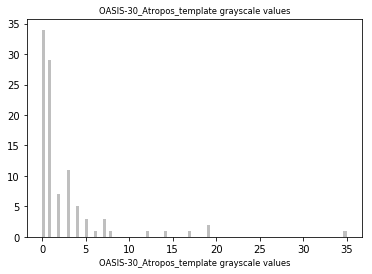

In [8]:
from mindboggle.mio.plots import histograms_of_lists
columns = [histogram_values]
column_name = 'OASIS-30_Atropos_template grayscale values'
ignore_columns = []
nbins = 100
axis_limits = []
titles = ['OASIS-30_Atropos_template grayscale values']
histograms_of_lists(columns, column_name, ignore_columns, nbins, axis_limits, titles)

<a id="example2"></a>
### Example 2:  Compute statistical measures across vertices per label.

**[stats_per_label](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/compute.py#L716)** (values, labels, include_labels=[], exclude_labels=[], weights=[], precision=1)

    When computing statistical measures across vertices per label, 
    you can optionally use weights (such as surface area per vertex),
    to compute, for example, a surface area-weighted mean:

    average value = sum(a_i * v_i) / total_surface_area,
    where *a_i* and *v_i* are the area and value for each vertex *i*.

    Reference:
        Weighted skewness and kurtosis unbiased by sample size
        Lorenzo Rimoldini, arXiv:1304.6564 (2013)
        http://arxiv.org/abs/1304.6564

    Parameters
    ----------
    values : numpy array of individual or lists of integers or floats
        values for all vertices
    labels : list or array of integers
        label for each value
    include_labels : list of integers
        labels to include
    exclude_labels : list of integers
        labels to be excluded
    weights : numpy array of floats
        weights to compute weighted statistical measures
    precision : integer
        number of decimal places to consider weights

    Returns
    -------
    medians : list of floats
        median for each label
    mads : list of floats
        median absolute deviation for each label
    means : list of floats
        mean for each label
    sdevs : list of floats
        standard deviation for each label
    skews : list of floats
        skew for each label
    kurts : list of floats
        kurtosis value for each label
    lower_quarts : list of floats
        lower quartile for each label
    upper_quarts : list of floats
        upper quartile for each label
    label_list : list of integers
        list of unique labels

In [6]:
import numpy as np
from mindboggle.mio.vtks import read_scalars
from mindboggle.guts.compute import stats_per_label
from mindboggle.mio.fetch_data import prep_tests
urls, fetch_data = prep_tests()
values_file = fetch_data(urls['left_mean_curvature'], '', '.vtk')
labels_file = fetch_data(urls['left_freesurfer_labels'], '', '.vtk')
area_file = fetch_data(urls['left_area'], '', '.vtk')
values, name = read_scalars(values_file, True, True)
areas, name = read_scalars(area_file, True, True)
labels, name = read_scalars(labels_file)
include_labels = []
exclude_labels = [-1]
weights = areas
precision = 1
medians, mads, means, sdevs, skews, kurts, lower_quarts, upper_quarts, label_list = stats_per_label(values, 
    labels, include_labels, exclude_labels, weights, precision)
medians

[-1.13602,
 -1.2296100000000001,
 -2.4966499999999998,
 -3.80782,
 -3.3730899999999999,
 -4.7229000000000001,
 -3.8298999999999999,
 -3.25325,
 -3.9102899999999998,
 -2.8330199999999999,
 -3.6722000000000001,
 -2.9595199999999999,
 -3.2435399999999999,
 -2.6196199999999998,
 -4.31311,
 -3.7510599999999998,
 -2.8605100000000001,
 -3.6007099999999999,
 -5.4514300000000002,
 -3.5950700000000002,
 -1.1490199999999999,
 -2.9771999999999998,
 -2.9401999999999999,
 -3.2038700000000002,
 -2.9556100000000001,
 -2.9895299999999998,
 -3.6794599999999997,
 -3.6627700000000001,
 -2.95478,
 -3.6303200000000002,
 -3.5913599999999999,
 -7.3693299999999997,
 -5.5285000000000002,
 -2.5504199999999999,
 -2.0070999999999999]

View histograms of statistical values:

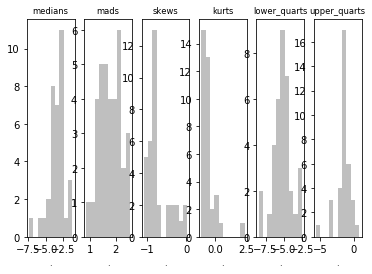

In [8]:
from mindboggle.mio.plots import histograms_of_lists
columns = [medians, mads, skews, kurts, lower_quarts, upper_quarts]
column_name = '.'
ignore_columns = []
nbins = 10
axis_limits = []
titles = ['medians', 'mads', 'skews', 'kurts', 'lower_quarts', 'upper_quarts']
histograms_of_lists(columns, column_name, ignore_columns, nbins, axis_limits, titles)

<a id="example3"></a>
### Example 3:  Decimate a left postcentral pial surface.

**[stats_per_label](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/mesh.py#L750)** (points, faces, reduction=0.75, smooth_steps=25, scalars=[], save_vtk=False, output_vtk='')

    Decimate vtk triangular mesh with vtk.vtkDecimatePro.

    Parameters
    ----------
    points : list of lists of floats
        each element is a list of 3-D coordinates of a vertex on a surface mesh
    faces : list of lists of integers
        each element is list of 3 indices of vertices that form a face
        on a surface mesh
    reduction : float
        fraction of mesh faces to remove
    smooth_steps : integer
        number of smoothing steps
    scalars : list of integers or floats
        optional scalars for output VTK file
    save_vtk : bool
        output decimated vtk file?
    output_vtk : string
        output decimated vtk file name

    Returns
    -------
    points : list of lists of floats
        decimated points
    faces : list of lists of integers
        decimated faces
    scalars : list of integers or floats
        scalars for output VTK file
    output_vtk : string
        output decimated vtk file

In [ ]:
from mindboggle.guts.mesh import decimate
from mindboggle.mio.vtks import read_vtk
from mindboggle.mio.fetch_data import prep_tests
urls, fetch_data = prep_tests()
input_vtk = fetch_data(urls['left_freesurfer_labels'], '', '.vtk')
points, f1, f2, faces, scalars, f3, f4, f5 = read_vtk(input_vtk)
reduction = 0.5
smooth_steps = 25
save_vtk = True
output_vtk = 'decimate.vtk'
points2, faces2, scalars, output_vtk = decimate(points, faces, reduction, smooth_steps, scalars, save_vtk, output_vtk)
(len(points), len(points2))
(len(faces), len(faces2))

View the decimated surface:

In [10]:
from mindboggle.mio.plots import plot_surfaces
plot_surfaces('decimate.vtk')

SystemExit: Huh?: decimate.vtk

/opt/conda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


<a id="example4"></a>
### Example 4:  Relabel a VTK surface.

**[relabel_surface](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/relabel.py#L300)** (vtk_file, hemi='', old_labels=[], new_labels=[], erase_remaining=True, erase_labels=[], erase_value=-1, output_file='')

    Parameters
    ----------
    vtk_file : string
         input labeled VTK file
    hemi : string
        hemisphere ('lh' or 'rh' or '')
        if set, add 1000 to left and 2000 to right hemisphere labels;
    old_labels : list of integers
        old labels (empty list if labels drawn from vtk scalars);
        may be used in conjunction with hemi
    new_labels : list of integers
        new labels (empty list if labels drawn from vtk scalars);
        may be used in conjunction with hemi
    erase_remaining : bool
        set all values not in old_labels to erase_value?
    erase_labels : list of integers
        values to erase (set to erase_value)
    erase_value : integer
        set vertices with labels in erase_labels to this value
    output_file : string
        new vtk file name

    Returns
    -------
    output_file : string
        new vtk file name

In [ ]:
import numpy as np
from mindboggle.guts.relabel import relabel_surface
from mindboggle.mio.vtks import read_scalars
from mindboggle.mio.fetch_data import prep_tests
urls, fetch_data = prep_tests()
vtk_file = fetch_data(urls['left_freesurfer_labels'], '', '.vtk')
hemi = 'lh'
old_labels = [1003,1009,1030]
new_labels = [0,500,1000]
erase_remaining = True
erase_labels = [0]
erase_value = -1
output_file = 'relabel_surface.vtk'
output_file = relabel_surface(vtk_file, hemi, old_labels, new_labels,
    erase_remaining, erase_labels, erase_value, output_file)
labels, name = read_scalars(output_file, True, True)
np.unique(labels)

array([  -1, 1000, 1500, 2000])

View relabeled surface file:

In [ ]:
from mindboggle.mio.plots import plot_surfaces
plot_surfaces(output_file)

<a id="example5"></a>
### Example 5:  Segment deep vertices of surface into contiguous regions.

**[segment_regions](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/segment.py#L181)** (vertices_to_segment, neighbor_lists, min_region_size=1, seed_lists=[], keep_seeding=False, spread_within_labels=False, labels=[], label_lists=[], values=[], max_steps='', background_value=-1, verbose=False)

    Parameters
    ----------
    vertices_to_segment : list of integers
        indices to mesh vertices to be segmented
    neighbor_lists : list of lists of integers
        each list contains indices to neighboring vertices for each vertex
    min_region_size : integer
        minimum size of segmented set of vertices
    seed_lists : list of lists, or empty list
        each list contains indices to seed vertices to segment vertices_to_segment
    keep_seeding : bool
        grow from new seeds even after all seed lists have fully grown
    spread_within_labels : bool
        grow seeds only by vertices with labels in the seed labels?
    labels : list of integers (required only if spread_within_labels)
        label numbers for all vertices
    label_lists : list of lists of integers (required only if spread_within_labels)
        List of unique labels for each seed list to grow into
        (If empty, set to unique labels for each seed list)
    values : list of floats (default empty)
        values for all vertices for use in preferentially directed segmentation
        (segment in direction of lower values)
    max_steps : integer (or empty string for infinity)
        maximum number of segmentation steps to take for each seed list
    background_value : integer or float
        background value
    verbose : bool
        print statements?

    Returns
    -------
    segments : numpy array of integers
        region numbers for all vertices

In [ ]:
# Example without seed lists:
import numpy as np
from mindboggle.guts.segment import segment_regions
from mindboggle.mio.vtks import read_vtk
from mindboggle.guts.mesh import find_neighbors
from mindboggle.mio.fetch_data import prep_tests
background_value = -1
urls, fetch_data = prep_tests()
depth_file = fetch_data(urls['left_travel_depth'], '', '.vtk')
f1,f2,f3, faces, depths, f4, npoints, t5 = read_vtk(depth_file, True, True)
vertices_to_segment = np.where(depths > 0.50)[0].tolist()  # (sped up)
neighbor_lists = find_neighbors(faces, npoints)
segments = segment_regions(vertices_to_segment, neighbor_lists)
len_segments = [len(np.where(segments == x)[0]) 
                for x in np.unique(segments) 
                if x != background_value]
len_segments[0:10]

Write results to vtk file and view:

In [ ]:
from mindboggle.mio.plots import plot_surfaces
from mindboggle.mio.vtks import rewrite_scalars
rewrite_scalars(depth_file, 'segment_regions_no_seeds.vtk', segments, 'segments', [], -1)
plot_surfaces('segment_regions_no_seeds.vtk')

<a id="example6"></a>
### Example 6:  Extract sulcus label borders.

**[extract_borders](https://github.com/nipy/mindboggle/blob/master/mindboggle/guts/segment.py#L1445)** 
                    (indices, labels, neighbor_lists,
                    ignore_values=[], return_label_pairs=False)

    Label borders are the set of all vertices
    whose neighbors do not share the same label.

    Parameters
    ----------
    indices : list of integers
        indices to (a subset of) vertices
    labels : numpy array of integers
        label numbers for all vertices
    neighbor_lists : list of lists of integers
        each list contains indices to neighboring vertices for each vertex
    ignore_values : list of integers
        integers to ignore (e.g., background)
    return_label_pairs : bool
        return label pairs?

    Returns
    -------
    border_indices : list of integers
        indices to label boundary vertices
    border_label_tuples : list of lists of sorted pairs of integers
        sorted label pairs
    unique_border_label_tuples : list of sorted pairs of integers
        unique, sorted label pairs

In [ ]:
from mindboggle.guts.segment import extract_borders
import numpy as np
from mindboggle.guts.mesh import find_neighbors
from mindboggle.guts.segment import extract_borders
from mindboggle.mio.vtks import read_vtk
from mindboggle.mio.fetch_data import prep_tests
urls, fetch_data = prep_tests()
label_file = fetch_data(urls['left_freesurfer_labels'], '', '.vtk')
f1,f2,f3, faces, labels, f4, npoints, f5 = read_vtk(label_file, True, True)
neighbor_lists = find_neighbors(faces, npoints)
ignore_values = []
return_label_pairs = True
indices_borders, label_pairs, f1 = extract_borders(list(range(npoints)), labels, neighbor_lists, ignore_values, return_label_pairs)
indices_borders[0:10]
label_pairs[0:5]

Write borders on surfaces to vtk file and view:

In [ ]:
from mindboggle.mio.plots import plot_surfaces
from mindboggle.mio.vtks import rewrite_scalars
IDs = -1 * np.ones(npoints)
IDs[indices_borders] = 1
rewrite_scalars(label_file, 'extract_borders.vtk', IDs, 'borders')
plot_surfaces('extract_borders.vtk')

Write just the borders to vtk file and view:

In [ ]:
rewrite_scalars(label_file, 'extract_borders_no_background.vtk', IDs, 'borders', IDs)
plot_surfaces('extract_borders_no_background.vtk')